# Benchmarks notebook

## Liquid Electrolyte 

BigMap collabolarion

Test trajectory `traj_2.1.xyz` with a total of `68001` frames and `8402` atoms.

# QUIPPY - ASE

In [1]:
import numpy as np
import time
import sys
from tqdm import tqdm
from ase.io import read, write
from quippy import descriptors
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../../')

In [3]:
from src import myTools, plotTools

## ASE - traj reader

In [4]:
def timed_traj_reader(sys_traj, chunk, single_frame=False, verbose=True):
    t0 = time.time()
    if single_frame:
        traj_ = read(sys_traj, index=str(chunk-1)+':'+str(chunk))
    else:
        traj_ = read(sys_traj, index='0:'+str(chunk))
    t1 = time.time()
    T = np.around((t1-t0),2)
    if verbose:
        print(f'time={T}s')
    return traj_ , T

In [5]:
traj_chunk = [1,2,5,10,20,100,500,1000]
Ntot_frames = 68001

In [6]:
sysdir_path = '/mnt/c/Users/andre/Documenti/Work/1.Cambridge/0.systems/1.ioanSystems/data/LiquidElectrolyte/'
sysname = 'traj_2.1.xyz'

### Reading a single frame

In [7]:
frame1, _ = timed_traj_reader(sys_traj=sysdir_path+sysname, 
                              chunk=1, single_frame=True)

time=0.08s


In [8]:
read(sysdir_path+sysname,index=':1')[0].info

{'Time': 0.0}

In [9]:
comp_time_sfr = list()
frame_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=True)
    comp_time_sfr.append(t)
    frame_list.append(f[0])

time=0.03s
time=0.04s
time=0.05s
time=0.07s
time=0.1s
time=0.41s
time=1.78s
time=3.43s


In [10]:
[f.info for f in frame_list]

[{'Time': 0.0},
 {'Time': 1.5},
 {'Time': 6.0},
 {'Time': 13.5},
 {'Time': 28.5},
 {'Time': 148.5},
 {'Time': 748.5},
 {'Time': 1498.5}]

### Reading chuncks of frames

In [14]:
comp_time_chunk = list()
bundle_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=False)
    print(frames, len(f))
    comp_time_chunk.append(t)
    bundle_list.append(f[0])

time=0.03s
1 1
time=0.05s
2 2
time=0.12s
5 5
time=0.22s
10 10
time=0.43s
20 20
time=2.17s
100 100
time=10.1s
500 500
time=19.87s
1000 1000


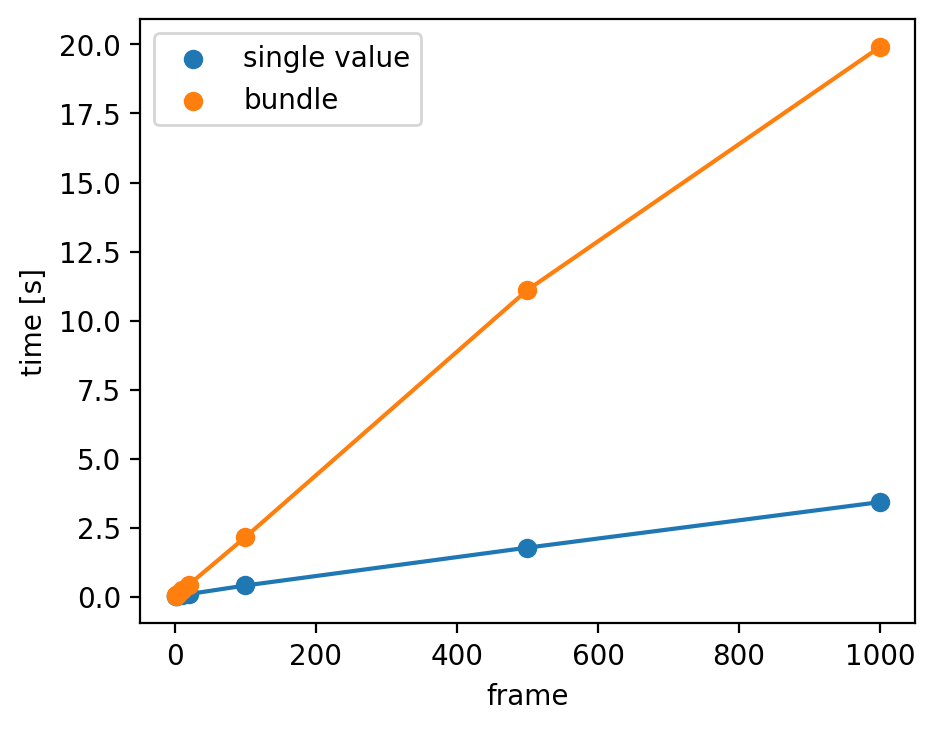

In [79]:
fig, ax = plotTools.get_axes(1)
ax.plot(traj_chunk,comp_time_sfr)
ax.scatter(traj_chunk,comp_time_sfr, label='single value', zorder=3)
ax.plot(traj_chunk,comp_time_chunk)
ax.scatter(traj_chunk,comp_time_chunk, label='bundle', zorder=3)
ax.set_xlabel('frame')
ax.set_ylabel('time [s]')
ax.legend()

In [15]:
bundle_list[0].info

{'Time': 0.0}